# Exploratory Data Analysis in Python


## 1. Getting to Know a Dataset

### Functions for initial explorations
You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called unemployment. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

In [1]:
import pandas as pd
#import unemployment.xlsx to pd dataframe
unemployment = pd.read_excel('unemployment.xlsx')
#see datatypes for columns
unemployment.dtypes

print("--" * 30)

# see columns in df
for cols in unemployment.columns:
    print(cols)

------------------------------------------------------------
country_code
country_name
continent
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [2]:
# Print the first five rows of unemployment
print(unemployment.head(5))

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [3]:
# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

### Counting categorical values
Recall from the previous exercise that the unemployment DataFrame contains 182 rows of country data including country_code, country_name, continent, and unemployment percentages from 2010 through 2021.

You'd now like to explore the categorical data contained in unemployment to understand the data that it contains related to each continent.

In [4]:
# Count the values associated with each continent in unemployment
print(unemployment.value_counts(["continent"]))

continent    
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


### Global unemployment in 2021
It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

In [5]:
# adjusting column names due to 2021 column not being accepted as x value below
unemployment.columns = ['country_code', 'country_name', 'continent',
                       "2010", "2011", "2012", "2013", "2014",
                       "2015", "2016", "2017", "2018", "2019",
                       "2020", "2021"]
for cols in unemployment.columns:
    print(cols)

country_code
country_name
continent
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


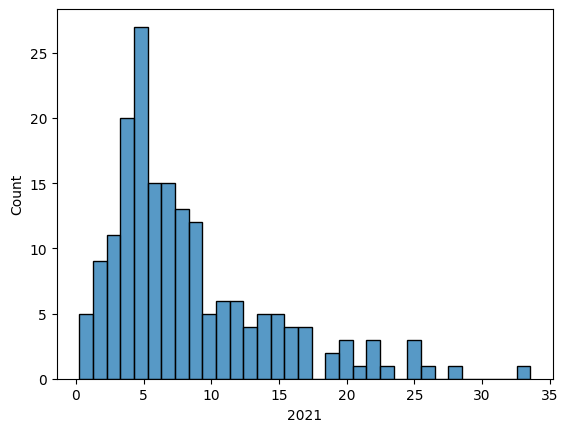

In [6]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth = 1)
plt.show()

### Detecting data types
A column has been changed in the unemployment DataFrame and it now has the wrong data type! This data type will stop you from performing effective exploration and analysis, so your task is to identify which column has the wrong data type and then fix it.


In [7]:
#inspect datatypes
unemployment.dtypes # 2019 is object not float

# Pretend to change datatype of 2019 column
unemployment['2019'] = unemployment['2019'].astype(str)

In [8]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype(float)
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


### Validating continents
Your colleague has informed you that the data on unemployment from countries in Oceania is not reliable, and you'd like to identify and exclude these countries from your unemployment data. The .isin() function can help with that!

Your task is to use .isin() to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. This will set you up to use the results of .isin() to quickly filter out Oceania countries using Boolean indexing.

In [9]:
# Define a Series describing whether each continent is outside of Oceania
# option+n = ~
not_oceania = ~unemployment['continent'].isin(['Oceania'])
print(not_oceania)

0      True
1      True
2      True
3      True
4      True
       ... 
178    True
179    True
180    True
181    True
182    True
Name: continent, Length: 183, dtype: bool


In [10]:
# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF                 South         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   
182         [1]:                   NaN            NaN    NaN    NaN    NaN   

      2013   2014   2015   2016   2017   2018   2019   2020   2

### Validating range
Now it's time to validate our numerical data. We saw in the previous lesson using .describe() that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

Your task in this exercise is to get much more detailed information about the range of unemployment data using Seaborn's boxplot, and you'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

0.26 33.56


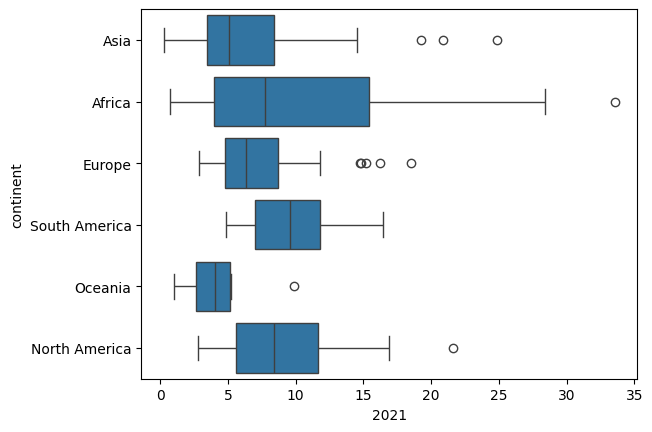

In [11]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data = unemployment, x = '2021', y = 'continent')
plt.show()

### Summaries with .groupby() and .agg()
In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [12]:
#some columns are string/obj data type so we need to handle this
numeric_columns = unemployment.select_dtypes(include=['float64'])

# Print the mean and standard deviation of rates by year
print(numeric_columns.agg(["mean","std"]))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  


In [13]:
unemployment.groupby('country_code')[[
    '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021']].agg(['mean', 'std'])

2010       2011       2012       2013       2014      ...  \
               mean std   mean std   mean std   mean std   mean std  ...   
country_code                                                         ...   
AFG           11.35 NaN  11.05 NaN  11.34 NaN  11.19 NaN  11.14 NaN  ...   
AGO            9.43 NaN   7.36 NaN   7.35 NaN   7.37 NaN   7.37 NaN  ...   
ALB           14.09 NaN  13.48 NaN  13.38 NaN  15.87 NaN  18.05 NaN  ...   
ARE            2.48 NaN   2.30 NaN   2.18 NaN   2.04 NaN   1.91 NaN  ...   
ARG            7.71 NaN   7.18 NaN   7.22 NaN   7.10 NaN   7.27 NaN  ...   
...             ...  ..    ...  ..    ...  ..    ...  ..    ...  ..  ...   
YEM           12.83 NaN  13.23 NaN  13.17 NaN  13.27 NaN  13.47 NaN  ...   
ZAF           24.68 NaN  24.64 NaN  24.73 NaN  24.56 NaN  24.89 NaN  ...   
ZMB           13.19 NaN  10.55 NaN   7.85 NaN   8.61 NaN   9.36 NaN  ...   
ZWE            5.21 NaN   5.37 NaN   5.15 NaN   4.98 NaN   4.77 NaN  ...   
[1]:            NaN NaN    NaN NaN    NaN NaN    NaN NaN    NaN NaN  ...   

               2017       2018       2019       2020       2021      
               mean std   mean std   mean std   mean std   mean std  
country_code                                                         
AFG           11.18 NaN  11.15 NaN  11.22 NaN  11.71 NaN  13.28 NaN  
AGO            7.41 NaN   7.42 NaN   7.42 NaN   8.33 NaN   8.53 NaN  
ALB           13.62 NaN  12.30 NaN  11.47 NaN  13.33 NaN  11.82 NaN  
ARE            2.46 NaN   2.35 NaN   2.23 NaN   3.19 NaN   3.36 NaN  
ARG            8.35 NaN   9.22 NaN   9.84 NaN  11.46 NaN  10.90 NaN  
...             ...  ..    ...  ..    ...  ..    ...  ..    ...  ..  
YEM           13.30 NaN  13.15 NaN  13.06 NaN  13.39 NaN  13.57 NaN  
ZAF           27.04 NaN  26.91 NaN  28.47 NaN  29.22 NaN  33.56 NaN  
ZMB           11.63 NaN  12.01 NaN  12.52 NaN  12.85 NaN  13.03 NaN  
ZWE            4.78 NaN   4.80 NaN   4.83 NaN   5.35 NaN   5.17 NaN  
[1]:            NaN NaN    NaN NaN    NaN NaN    NaN NaN    NaN NaN  

[183 rows x 24 columns]

### Named aggregations
You've seen how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [14]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std'),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


### Visualizing categorical summaries
In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.

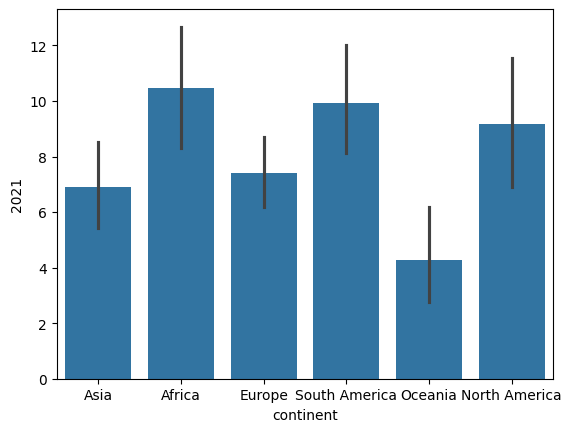

In [15]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data = unemployment, x = 'continent', y = '2021')
plt.show()

## 2. Data Cleaning and Imputation

### Dealing with missing data
It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [16]:
#import planes.csv
planes = pd.read_csv('planes.csv')
print(planes.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
1       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
2       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   
3     SpiceJet      24/06/2019   Kolkata    Banglore              CCU → BLR   
4  Jet Airways      12/03/2019  Banglore   New Delhi        BLR → BOM → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
0    09:25  04:25 10 Jun      19h     2 stops                      No info   
1    18:05         23:30   5h 25m      1 stop                      No info   
2    16:50         21:35   4h 45m      1 stop                      No info   
3    09:00         11:25   2h 25m    non-stop                      No info   
4    18:55  10:25 13 Mar  15h 30m      1 stop  In-flight meal not included   

     Price  
0  13882.0  
1   6218.0  
2  13302.0  
3   

In [17]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


### Strategies for remaining missing data
The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


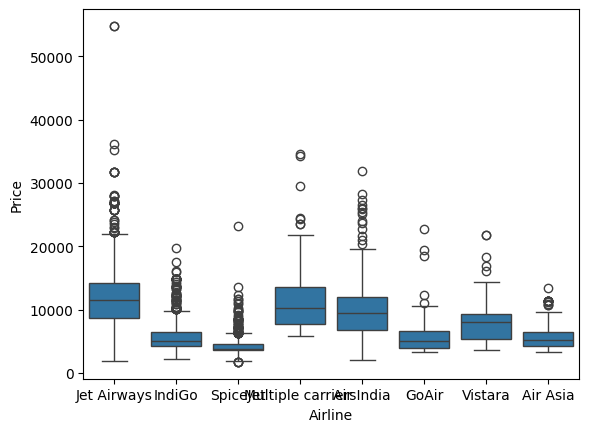

In [18]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()

How should you deal with the missing values in "Additional_Info" and "Price"?

- Remove the additional_info column and input the median by Airline Column for missing values of Price

### Imputing missing plane prices
You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

In [19]:
#remove Additional_Info from df 19
planes.drop('Additional_Info', axis=1, inplace=True)

for column_headers in planes.columns: 
    print(column_headers)

Airline
Date_of_Journey
Source
Destination
Route
Dep_Time
Arrival_Time
Duration
Total_Stops
Price


In [20]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


### Finding the number of unique values
You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [21]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


### Flight duration categories
As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

In [22]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
# You'll need to include a pipe | inside your strings between any values you would like to capture.

short_flights = "^0h|^1h|^2h|^3h|^4h" #these begin with 0h, or 1h as they may be 1h 20min etc

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

### Adding duration categories
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

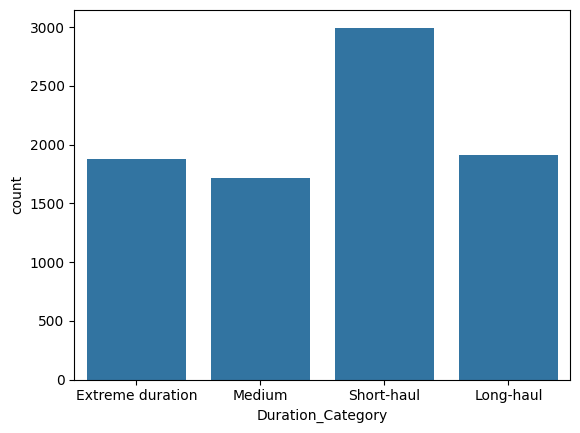

In [23]:
import numpy as np

# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration") #default condition is to specifiy what to be returned if not categorised

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [24]:
print(long_flights)

10h|11h|12h|13h|14h|15h|16h


### Flight Duration

You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis.

In [25]:
# Print the first five values of the "Duration" column.
print(planes['Duration'].head())
# we can see our column has h, m and whitespace so we need to conver to float i.e. 45.6

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


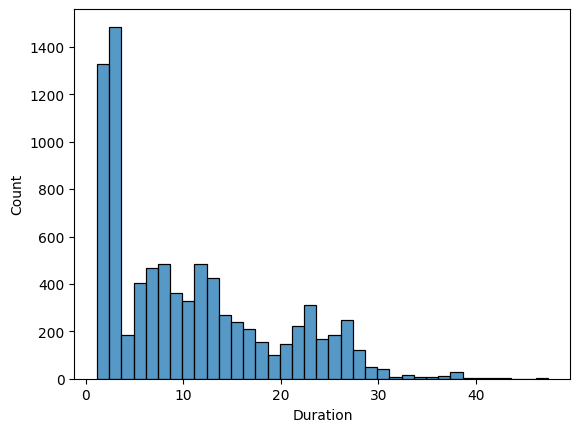

In [26]:
# Replace necessary characters
planes['Duration'] = planes['Duration'].str.replace('h', '') # replace h with nothing
planes['Duration'] = planes['Duration'].str.replace('m', '') # replace m with nothing
planes['Duration'] = planes['Duration'].str.replace(r'\s', '.', regex = True) #replace whitespace with .

# Convert to float data type
planes['Duration'] = planes['Duration'].astype(float)

#Plot a histogram of "Duration" values.
sns.histplot(data = planes, x = 'Duration')
plt.show()


### Adding descriptive statistics
Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.


In [27]:
#Add a column to planes containing the standard deviation of "Price" based on "Airline".
planes['airline_price_st_dev'] = planes.groupby('Airline')['Price'].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [28]:
# Median Duration by Airline
planes['airline_median_duration'] = planes.groupby('Airline')['Duration'].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.20                      3082
IndiGo             2.55                       1632
Air India          15.50                      1399
Multiple carriers  10.15                       959
SpiceJet           2.30                        653
Vistara            3.10                        376
Air Asia           2.50                        260
GoAir              2.55                        147
Name: count, dtype: int64


In [29]:
# Mean Price by Destination
planes['price_destination_mean'] = planes.groupby('Destination')['Price'].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


#### Identifying outliers
* You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?
* Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame.
* matplotlib.pyplot and seaborn have been imported for you as plt and sns respectively.

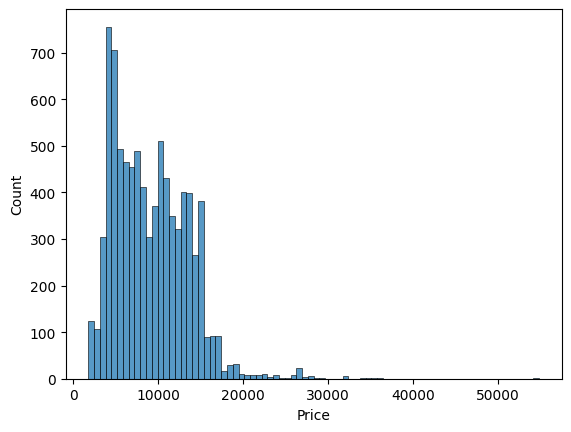

In [30]:
# Plot a histogram of flight prices
sns.histplot(data = planes, x = 'Price')
plt.show()

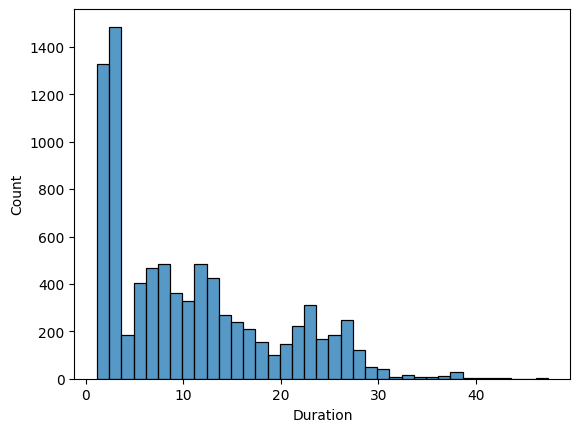

In [31]:
# Plot a histogram of flight prices
sns.histplot(data = planes, x = 'Duration')
plt.show()

#### Removing Outliers
While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.

In [32]:
# Display descriptive statistics for flight duration
print(planes['Duration'].describe())

#Question = Which column potentially contains outliers? 
print(planes['Price'].describe())
# A) Duration and Price -- look at the max values - we can see duraiton is postively skewed as is price

count    8508.000000
mean       10.566984
std         8.489069
min         1.150000
25%         2.500000
50%         8.400000
75%        15.400000
max        47.400000
Name: Duration, dtype: float64
count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


In [33]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


## 3. Relationships in Data

Import divorce.csv, saving as a DataFrame, divorce; indicate in the import function that the divorce_date, dob_man, dob_woman, and marriage_date columns should be imported as DateTime values.


In [34]:
import pandas as pd

divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

In [35]:
# marriage_date - convert data type manually

divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [36]:
# Define a column called marriage_year, which contains just the year portion of the marriage_date column.

divorce['marriage_year'] = divorce['marriage_date'].dt.year
print(divorce['marriage_year'].head())

0    2000
1    2001
2    2000
3    2006
4    2007
Name: marriage_year, dtype: int32


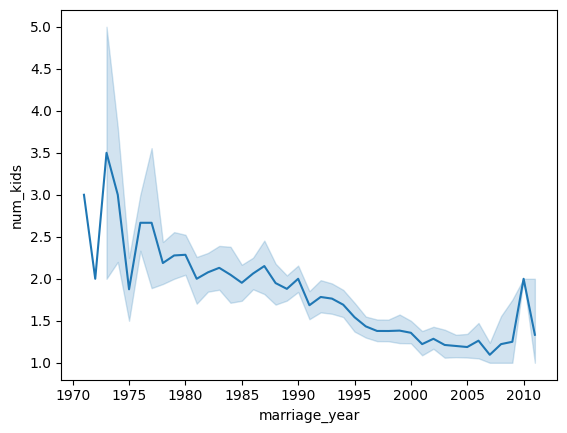

In [37]:
# Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = divorce, x = 'marriage_year', y= 'num_kids')
plt.show()

### Correlation checking between our variables...

### The correlation between num_kids and income_man is stronger than the correlation between num_kids and marriage_duration?


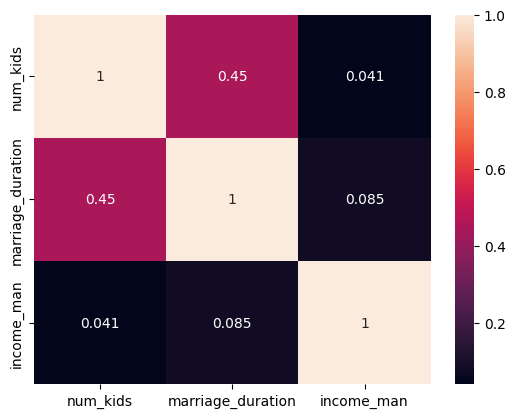

In [38]:
#FALSE
sns.heatmap(divorce[['num_kids','marriage_duration', 'income_man']].corr(), annot=True)
plt.show()

### A later marriage_year causes a lower number of children, represented by num_kids?


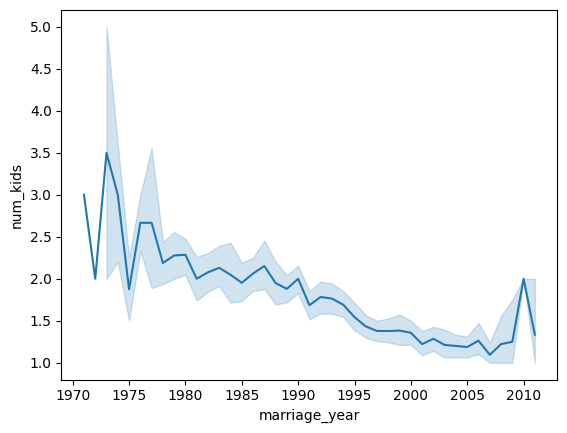

In [39]:
# False - dosen't cause its a correaltion

sns.lineplot(data = divorce, x = 'marriage_year', y= 'num_kids')
plt.show()


### marriage_duration is strongly positively correlated with marriage_month.

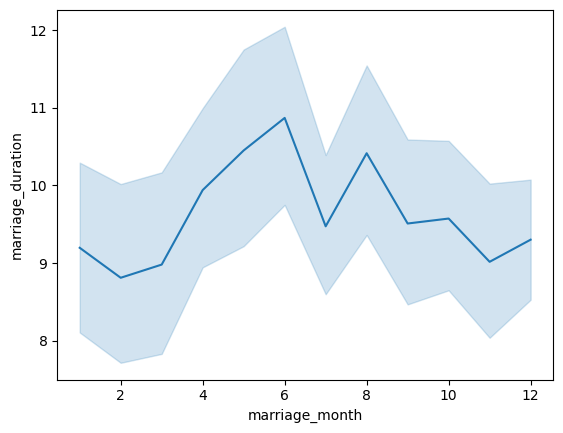

In [40]:
# FALSE

# line shows average with light blue shading showing the 95% CI

divorce['marriage_month'] = divorce['marriage_date'].dt.month

sns.lineplot(data = divorce, x = 'marriage_month', y='marriage_duration')
plt.show()

### A later marriage_year is correlated with having fewer children.

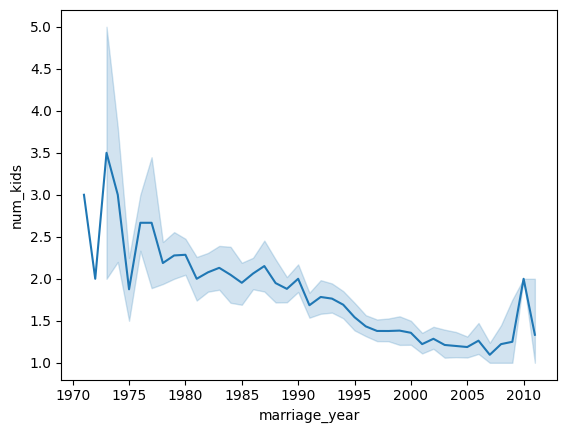

In [41]:
#True

sns.lineplot(data = divorce, x = 'marriage_year', y = 'num_kids')
plt.show()

### continue with the course.....

##### Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.


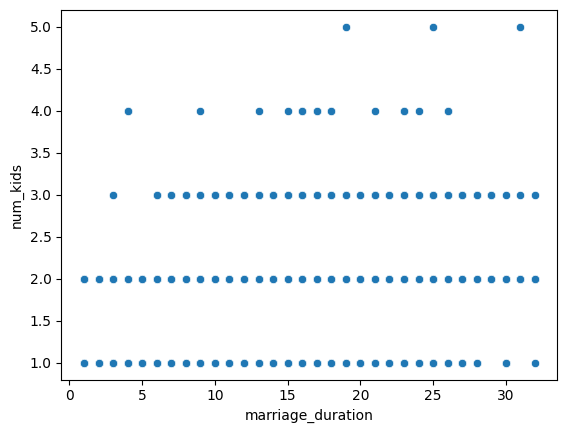

In [42]:

sns.scatterplot(data = divorce, x = 'marriage_duration', y = 'num_kids')
plt.show()

##### Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame.


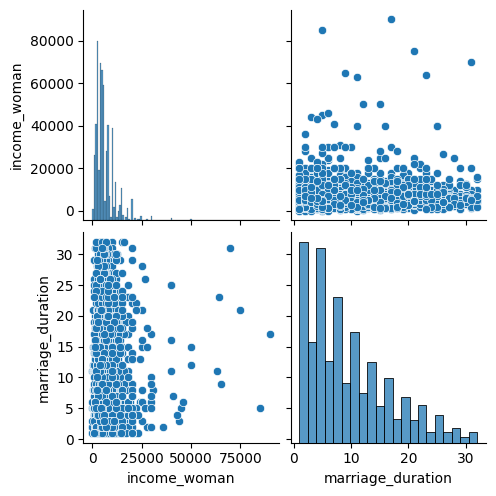

In [43]:

sns.pairplot(data=divorce, vars = ['income_woman', 'marriage_duration'])
plt.show()

### Categorial data in scatter plots

In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.


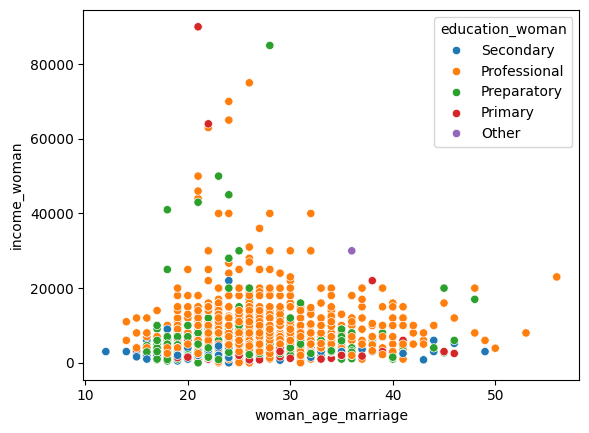

In [44]:
#define women age marriage i.e. get year of marriage date and year of dob women and subtract
divorce['woman_age_marriage'] = divorce['marriage_date'].dt.year-divorce['dob_woman'].dt.year

#create scatter plot
sns.scatterplot(data = divorce, x = 'woman_age_marriage', y='income_woman', hue = 'education_woman')
plt.show()

### Exploring with KDE plots

Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

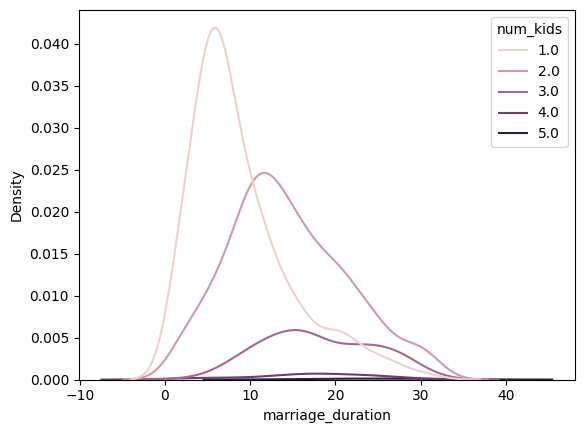

In [45]:
# Create a KDE plot that shows marriage_duration on the x-axis and a different colored line for each possible number of children that a couple might have, represented by num_kids.

sns.kdeplot(data = divorce, x = 'marriage_duration', hue = 'num_kids')
plt.show()

Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.

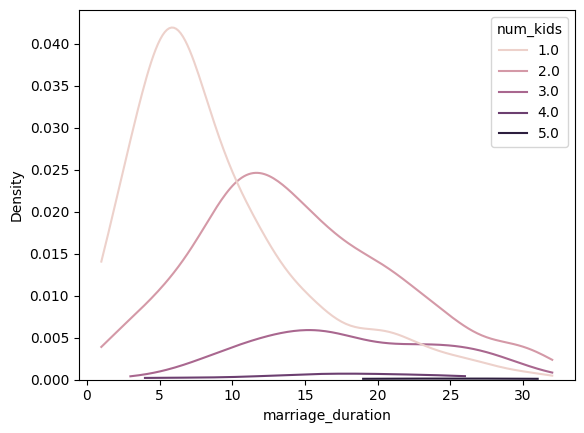

In [46]:
# Update the KDE plot so that marriage duration can't be smoothed too far

sns.kdeplot(data = divorce, x = 'marriage_duration', hue = 'num_kids', cut = 0)
plt.show()

Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.



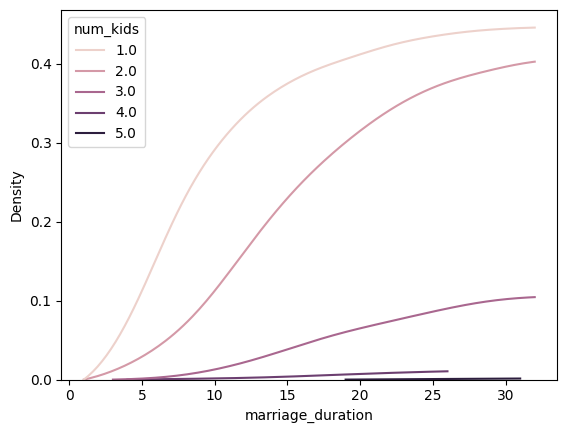

In [47]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

## 4. Turning Exploratoty Analysis into Action

### Checking for class imbalance

The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

In [48]:
salaries = pd.read_csv('ds_salaries_clean.csv')
print(salaries.columns)


Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [49]:
#Print the relative frequency of the "Job_Category" column from salaries DataFrame.
print(salaries['Designation'].value_counts())

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [131]:
# CREATE A NEW COLUMN FOR JOB CATEGORY 
def job_category(value):
    if value == 'Applied Data Scientist' or value == 'Head of Data Science' or value == 'Director of Data Science' or value == 'Principal Data Scientist' or value == 'Data Science Manager' or value == 'Data Scientist':
        return 'Data_Science'
    elif value == 'Data Engineer' or value == 'Head of Data' or value == 'Data Engineering Manager' or value == 'Lead Data Engineer' or value == 'Big Data Engineer' or value == 'Data Architect' or value == 'Data Engineer':
        return 'Data_Engineering'
    elif value == 'Marketing Data Analyst' or value == 'Data Analytics Lead' or value == 'Business Data Analyst' or value == 'BI Data Analyst' or value == 'Data Analytics Manager' or value == 'Data Analyst':
        return 'Data_Analytics' 
    elif value == 'Machine Learning Engineer' or value == 'Applied Machine Learning Scientist' or value == 'Computer Vision Engineer' or value == 'ML Engineer' or value == 'AI Scientist' or value == 'Machine Learning Scientist':
        return 'Machine_Learning'
    else:
        return 'Other'

#new column is created with conditions from the function
salaries['Job_Category'] = salaries['Designation'].apply(job_category) 

#frequency
print(salaries['Job_Category'].value_counts())
print('                                               ')
print('                                               ')

# relative frequency 
print(salaries['Job_Category'].value_counts(normalize=True))


Job_Category
Data_Science        178
Data_Engineering    167
Data_Analytics      117
Other                73
Machine_Learning     72
Name: count, dtype: int64
                                               
                                               
Job_Category
Data_Science        0.293245
Data_Engineering    0.275124
Data_Analytics      0.192751
Other               0.120264
Machine_Learning    0.118616
Name: proportion, dtype: float64


### Cross-tabulation

Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.

In [95]:
# Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [96]:

# Cross-tabulate "Job_Category" and classes of "Company_Size" as column names.

print(pd.crosstab(salaries['Job_Category'], salaries['Company_Size']))

Company_Size       L    M   S
Job_Category                 
Data_Analytics    23   84  10
Data_Engineering  52  101  14
Data_Science      64   90  24
Machine_Learning  23   26  23
Other             36   25  12


In [100]:
# Update pd.crosstab() to return the mean "Salary_USD" values.

print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
                  values=salaries["Salary_USD"], aggfunc='mean'))

Company_Size                  L              M             S
Job_Category                                                
Data_Analytics     98308.000000   95617.928571  42618.400000
Data_Engineering  107838.653846  118227.445545  76981.857143
Data_Science      120243.859375  125869.388889  70993.500000
Machine_Learning  126507.782609   94487.846154  80951.000000
Other             113048.944444  105282.000000  90236.416667


### Extracting features for correlation
In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

In [111]:
#add new column with values
salaries['date_of_response'] = [('2020-01-07 00:00:00'), ('2020-09-19 00:00:00'), ('2020-11-21 00:00:00'), ('2020-11-29 00:00:00'), ('2020-09-07 00:00:00'), ('2020-08-04 00:00:00'), ('2020-05-27 00:00:00'), ('2020-10-13 00:00:00'), ('2020-05-23 00:00:00'), ('2020-10-15 00:00:00'), ('2020-11-07 00:00:00'), ('2020-08-15 00:00:00'), ('2020-03-16 00:00:00'), ('2020-10-08 00:00:00'), ('2020-05-02 00:00:00'), ('2020-05-24 00:00:00'), ('2020-04-19 00:00:00'), ('2020-05-11 00:00:00'), ('2020-09-25 00:00:00'), ('2020-04-26 00:00:00'), ('2020-08-20 00:00:00'), ('2020-07-10 00:00:00'), ('2020-11-15 00:00:00'), ('2020-10-09 00:00:00'), ('2020-08-24 00:00:00'), ('2020-02-21 00:00:00'), ('2020-02-04 00:00:00'), ('2020-04-10 00:00:00'), ('2020-11-17 00:00:00'), ('2020-07-08 00:00:00'), ('2020-11-21 00:00:00'), ('2020-01-09 00:00:00'), ('2020-06-19 00:00:00'), ('2020-04-05 00:00:00'), ('2020-11-23 00:00:00'), ('2020-01-05 00:00:00'), ('2020-01-25 00:00:00'), ('2020-10-20 00:00:00'), ('2020-08-01 00:00:00'), ('2020-10-25 00:00:00'), ('2020-03-26 00:00:00'), ('2020-10-13 00:00:00'), ('2020-03-10 00:00:00'), ('2020-11-24 00:00:00'), ('2020-11-07 00:00:00'), ('2020-07-03 00:00:00'), ('2021-04-19 00:00:00'), ('2021-05-30 00:00:00'), ('2021-05-23 00:00:00'), ('2021-09-04 00:00:00'), ('2021-07-06 00:00:00'), ('2021-09-30 00:00:00'), ('2021-01-15 00:00:00'), ('2021-01-24 00:00:00'), ('2021-09-05 00:00:00'), ('2021-01-13 00:00:00'), ('2021-01-29 00:00:00'), ('2021-08-28 00:00:00'), ('2021-10-20 00:00:00'), ('2021-07-08 00:00:00'), ('2021-10-13 00:00:00'), ('2021-03-25 00:00:00'), ('2021-04-28 00:00:00'), ('2021-01-25 00:00:00'), ('2021-10-09 00:00:00'), ('2021-08-02 00:00:00'), ('2021-09-21 00:00:00'), ('2021-11-24 00:00:00'), ('2021-07-19 00:00:00'), ('2021-01-29 00:00:00'), ('2021-07-24 00:00:00'), ('2021-01-08 00:00:00'), ('2021-06-08 00:00:00'), ('2021-09-05 00:00:00'), ('2021-04-22 00:00:00'), ('2021-07-19 00:00:00'), ('2021-09-24 00:00:00'), ('2021-02-21 00:00:00'), ('2021-10-25 00:00:00'), ('2021-01-04 00:00:00'), ('2021-06-18 00:00:00'), ('2021-06-07 00:00:00'), ('2021-08-26 00:00:00'), ('2021-11-12 00:00:00'), ('2021-02-24 00:00:00'), ('2021-03-14 00:00:00'), ('2021-04-01 00:00:00'), ('2021-07-26 00:00:00'), ('2021-07-20 00:00:00'), ('2021-07-09 00:00:00'), ('2021-08-26 00:00:00'), ('2021-11-30 00:00:00'), ('2021-07-14 00:00:00'), ('2021-03-26 00:00:00'), ('2021-04-25 00:00:00'), ('2021-06-25 00:00:00'), ('2021-01-24 00:00:00'), ('2021-08-23 00:00:00'), ('2021-04-11 00:00:00'), ('2021-04-11 00:00:00'), ('2021-04-15 00:00:00'), ('2021-05-30 00:00:00'), ('2021-10-17 00:00:00'), ('2021-04-08 00:00:00'), ('2021-03-09 00:00:00'), ('2021-09-01 00:00:00'), ('2021-09-15 00:00:00'), ('2021-11-20 00:00:00'), ('2021-06-01 00:00:00'), ('2021-03-18 00:00:00'), ('2021-01-26 00:00:00'), ('2021-06-06 00:00:00'), ('2021-04-30 00:00:00'), ('2021-08-01 00:00:00'), ('2021-07-28 00:00:00'), ('2021-10-02 00:00:00'), ('2021-11-05 00:00:00'), ('2021-02-04 00:00:00'), ('2021-10-04 00:00:00'), ('2021-09-04 00:00:00'), ('2021-08-09 00:00:00'), ('2021-08-13 00:00:00'), ('2021-03-15 00:00:00'), ('2021-10-05 00:00:00'), ('2021-07-13 00:00:00'), ('2021-06-08 00:00:00'), ('2021-11-17 00:00:00'), ('2021-05-20 00:00:00'), ('2021-06-21 00:00:00'), ('2021-08-21 00:00:00'), ('2021-02-09 00:00:00'), ('2021-04-29 00:00:00'), ('2021-04-22 00:00:00'), ('2021-04-30 00:00:00'), ('2021-07-23 00:00:00'), ('2021-09-02 00:00:00'), ('2021-11-11 00:00:00'), ('2021-03-20 00:00:00'), ('2021-06-01 00:00:00'), ('2021-06-27 00:00:00'), ('2021-08-07 00:00:00'), ('2021-05-23 00:00:00'), ('2021-07-01 00:00:00'), ('2021-07-13 00:00:00'), ('2021-07-18 00:00:00'), ('2021-01-20 00:00:00'), ('2021-08-26 00:00:00'), ('2021-03-25 00:00:00'), ('2021-05-09 00:00:00'), ('2021-02-15 00:00:00'), ('2020-09-19 00:00:00'), ('2020-11-21 00:00:00'), ('2020-11-29 00:00:00'), ('2020-09-07 00:00:00'), ('2020-08-04 00:00:00'), ('2020-05-27 00:00:00'), ('2020-10-13 00:00:00'), ('2020-05-23 00:00:00'), ('2020-10-15 00:00:00'), ('2020-11-07 00:00:00'), ('2020-08-15 00:00:00'), ('2020-03-16 00:00:00'), ('2020-10-08 00:00:00'), ('2020-05-02 00:00:00'), ('2020-05-24 00:00:00'), ('2020-04-19 00:00:00'), ('2020-05-11 00:00:00'), ('2020-09-25 00:00:00'), ('2020-04-26 00:00:00'), ('2020-08-20 00:00:00'), ('2020-07-10 00:00:00'), ('2020-11-15 00:00:00'), ('2020-10-09 00:00:00'), ('2020-08-24 00:00:00'), ('2020-02-21 00:00:00'), ('2020-02-04 00:00:00'), ('2020-04-10 00:00:00'), ('2020-11-17 00:00:00'), ('2020-07-08 00:00:00'), ('2020-11-21 00:00:00'), ('2020-01-09 00:00:00'), ('2020-06-19 00:00:00'), ('2020-04-05 00:00:00'), ('2020-11-23 00:00:00'), ('2020-01-05 00:00:00'), ('2020-01-25 00:00:00'), ('2020-10-20 00:00:00'), ('2020-08-01 00:00:00'), ('2020-10-25 00:00:00'), ('2020-03-26 00:00:00'), ('2020-10-13 00:00:00'), ('2020-03-10 00:00:00'), ('2020-11-24 00:00:00'), ('2020-11-07 00:00:00'), ('2020-07-03 00:00:00'), ('2021-04-19 00:00:00'), ('2021-05-30 00:00:00'), ('2021-05-23 00:00:00'), ('2021-09-04 00:00:00'), ('2021-07-06 00:00:00'), ('2021-09-30 00:00:00'), ('2021-01-15 00:00:00'), ('2021-01-24 00:00:00'), ('2021-09-05 00:00:00'), ('2021-01-13 00:00:00'), ('2021-01-29 00:00:00'), ('2021-08-28 00:00:00'), ('2021-10-20 00:00:00'), ('2021-07-08 00:00:00'), ('2021-10-13 00:00:00'), ('2021-03-25 00:00:00'), ('2021-04-28 00:00:00'), ('2021-01-25 00:00:00'), ('2021-10-09 00:00:00'), ('2021-08-02 00:00:00'), ('2021-09-21 00:00:00'), ('2021-11-24 00:00:00'), ('2021-07-19 00:00:00'), ('2021-01-29 00:00:00'), ('2021-07-24 00:00:00'), ('2021-01-08 00:00:00'), ('2021-06-08 00:00:00'), ('2021-09-05 00:00:00'), ('2021-04-22 00:00:00'), ('2021-07-19 00:00:00'), ('2021-09-24 00:00:00'), ('2021-02-21 00:00:00'), ('2021-10-25 00:00:00'), ('2021-01-04 00:00:00'), ('2021-06-18 00:00:00'), ('2021-06-07 00:00:00'), ('2021-08-26 00:00:00'), ('2021-11-12 00:00:00'), ('2021-02-24 00:00:00'), ('2021-03-14 00:00:00'), ('2021-04-01 00:00:00'), ('2021-07-26 00:00:00'), ('2021-07-20 00:00:00'), ('2021-07-09 00:00:00'), ('2021-08-26 00:00:00'), ('2021-11-30 00:00:00'), ('2021-07-14 00:00:00'), ('2021-03-26 00:00:00'), ('2021-04-25 00:00:00'), ('2021-06-25 00:00:00'), ('2021-01-24 00:00:00'), ('2021-08-23 00:00:00'), ('2021-04-11 00:00:00'), ('2021-04-11 00:00:00'), ('2021-04-15 00:00:00'), ('2021-05-30 00:00:00'), ('2021-10-17 00:00:00'), ('2021-04-08 00:00:00'), ('2021-03-09 00:00:00'), ('2021-09-01 00:00:00'), ('2021-09-15 00:00:00'), ('2021-11-20 00:00:00'), ('2021-06-01 00:00:00'), ('2021-03-18 00:00:00'), ('2021-01-26 00:00:00'), ('2021-06-06 00:00:00'), ('2021-04-30 00:00:00'), ('2021-08-01 00:00:00'), ('2021-07-28 00:00:00'), ('2021-10-02 00:00:00'), ('2021-11-05 00:00:00'), ('2021-02-04 00:00:00'), ('2021-10-04 00:00:00'), ('2021-09-04 00:00:00'), ('2021-08-09 00:00:00'), ('2021-08-13 00:00:00'), ('2021-03-15 00:00:00'), ('2021-10-05 00:00:00'), ('2021-07-13 00:00:00'), ('2021-06-08 00:00:00'), ('2021-11-17 00:00:00'), ('2021-05-20 00:00:00'), ('2021-06-21 00:00:00'), ('2021-08-21 00:00:00'), ('2021-02-09 00:00:00'), ('2021-04-29 00:00:00'), ('2021-04-22 00:00:00'), ('2021-04-30 00:00:00'), ('2021-07-23 00:00:00'), ('2021-09-02 00:00:00'), ('2021-11-11 00:00:00'), ('2021-03-20 00:00:00'), ('2021-06-01 00:00:00'), ('2021-06-27 00:00:00'), ('2021-08-07 00:00:00'), ('2021-05-23 00:00:00'), ('2021-07-01 00:00:00'), ('2021-07-13 00:00:00'), ('2021-07-18 00:00:00'), ('2021-01-20 00:00:00'), ('2021-08-26 00:00:00'), ('2021-03-25 00:00:00'), ('2021-05-09 00:00:00'), ('2021-02-15 00:00:00'),('2021-09-18 00:00:00'), ('2021-07-07 00:00:00'), ('2021-08-11 00:00:00'), ('2021-02-25 00:00:00'), ('2021-03-11 00:00:00'), ('2021-02-07 00:00:00'), ('2021-09-15 00:00:00'), ('2021-03-05 00:00:00'), ('2021-06-26 00:00:00'), ('2021-10-26 00:00:00'), ('2021-03-17 00:00:00'), ('2021-01-19 00:00:00'), ('2021-02-18 00:00:00'), ('2021-05-18 00:00:00'), ('2021-05-05 00:00:00'), ('2021-09-16 00:00:00'), ('2021-07-25 00:00:00'), ('2021-10-28 00:00:00'), ('2021-07-18 00:00:00'), ('2021-09-18 00:00:00'), ('2021-07-07 00:00:00'), ('2021-11-29 00:00:00'), ('2021-09-02 00:00:00'), ('2021-05-10 00:00:00'), ('2021-01-05 00:00:00'), ('2021-10-23 00:00:00'), ('2021-08-17 00:00:00'), ('2021-04-29 00:00:00'), ('2021-02-03 00:00:00'), ('2021-02-07 00:00:00'), ('2021-08-29 00:00:00'), ('2021-09-20 00:00:00'), ('2021-03-05 00:00:00'), ('2021-08-14 00:00:00'), ('2021-02-07 00:00:00'), ('2021-04-13 00:00:00'), ('2021-04-16 00:00:00'), ('2021-03-18 00:00:00'), ('2022-07-19 00:00:00'), ('2022-11-05 00:00:00'), ('2022-06-18 00:00:00'), ('2022-08-23 00:00:00'), ('2022-06-27 00:00:00'), ('2022-04-12 00:00:00'), ('2022-04-16 00:00:00'), ('2022-06-23 00:00:00'), ('2022-10-03 00:00:00'), ('2022-08-29 00:00:00'), ('2022-10-07 00:00:00'), ('2022-04-08 00:00:00'), ('2022-01-16 00:00:00'), ('2022-03-01 00:00:00'), ('2022-11-17 00:00:00'), ('2022-03-08 00:00:00'), ('2022-02-23 00:00:00'), ('2022-07-06 00:00:00'), ('2022-06-05 00:00:00'), ('2022-04-22 00:00:00'), ('2022-10-06 00:00:00'), ('2022-07-01 00:00:00'), ('2022-09-04 00:00:00'), ('2022-02-17 00:00:00'), ('2022-09-17 00:00:00'), ('2022-01-16 00:00:00'), ('2022-01-15 00:00:00'), ('2022-07-07 00:00:00'), ('2022-08-08 00:00:00'), ('2022-08-06 00:00:00'), ('2022-08-18 00:00:00'), ('2022-03-17 00:00:00'), ('2022-09-28 00:00:00'), ('2022-02-07 00:00:00'), ('2022-06-12 00:00:00'), ('2022-06-13 00:00:00'), ('2022-11-15 00:00:00'), ('2022-06-30 00:00:00'), ('2022-02-14 00:00:00'), ('2022-04-09 00:00:00'), ('2022-11-18 00:00:00'), ('2022-09-29 00:00:00'), ('2022-06-24 00:00:00'), ('2022-02-12 00:00:00'), ('2022-04-20 00:00:00'), ('2022-08-20 00:00:00'), ('2022-09-18 00:00:00'), ('2022-04-20 00:00:00'), ('2022-01-11 00:00:00'), ('2022-08-02 00:00:00'), ('2022-04-14 00:00:00'), ('2022-02-15 00:00:00'), ('2022-06-25 00:00:00'), ('2022-10-14 00:00:00'), ('2022-09-02 00:00:00'), ('2022-03-02 00:00:00'), ('2022-02-20 00:00:00'), ('2022-07-24 00:00:00'), ('2022-07-27 00:00:00'), ('2022-03-30 00:00:00'), ('2022-07-15 00:00:00'), ('2022-07-19 00:00:00'), ('2022-01-28 00:00:00'), ('2022-05-12 00:00:00'), ('2022-07-23 00:00:00'), ('2022-07-20 00:00:00'), ('2022-05-14 00:00:00'), ('2022-05-21 00:00:00'), ('2022-07-08 00:00:00'), ('2022-09-07 00:00:00'), ('2022-03-30 00:00:00'), ('2022-01-16 00:00:00'), ('2022-01-19 00:00:00'), ('2022-01-24 00:00:00'), ('2022-11-07 00:00:00'), ('2022-08-25 00:00:00'), ('2022-04-02 00:00:00'), ('2022-09-24 00:00:00'), ('2022-01-16 00:00:00'), ('2022-04-23 00:00:00'), ('2022-11-17 00:00:00'), ('2022-10-27 00:00:00'), ('2022-03-21 00:00:00'), ('2022-05-14 00:00:00'), ('2022-10-28 00:00:00'), ('2022-10-23 00:00:00'), ('2022-05-08 00:00:00'), ('2022-03-10 00:00:00'), ('2022-09-09 00:00:00'), ('2022-02-27 00:00:00'), ('2022-09-07 00:00:00'), ('2022-04-02 00:00:00'), ('2022-11-06 00:00:00'), ('2022-05-01 00:00:00'), ('2022-07-13 00:00:00'), ('2022-02-28 00:00:00'), ('2022-08-08 00:00:00'), ('2022-08-09 00:00:00'), ('2022-09-24 00:00:00'), ('2022-01-15 00:00:00'), ('2022-01-13 00:00:00'), ('2022-02-24 00:00:00'), ('2022-04-30 00:00:00'), ('2022-09-26 00:00:00'), ('2022-10-08 00:00:00'), ('2022-02-21 00:00:00'), ('2022-06-30 00:00:00'), ('2022-10-10 00:00:00'), ('2022-03-20 00:00:00'), ('2022-10-18 00:00:00'), ('2022-08-24 00:00:00'), ('2022-09-24 00:00:00'), ('2022-02-22 00:00:00'), ('2022-08-21 00:00:00'), ('2022-08-23 00:00:00'), ('2022-05-21 00:00:00'), ('2022-03-01 00:00:00'), ('2022-08-02 00:00:00'), ('2022-08-01 00:00:00'), ('2022-08-23 00:00:00'), ('2022-05-02 00:00:00'), ('2022-09-08 00:00:00'), ('2022-08-02 00:00:00'), ('2022-07-01 00:00:00'), ('2022-06-07 00:00:00'), ('2022-02-16 00:00:00'), ('2022-10-18 00:00:00'), ('2022-10-01 00:00:00'), ('2022-01-19 00:00:00'), ('2022-10-16 00:00:00'), ('2022-08-16 00:00:00'), ('2022-07-28 00:00:00'), ('2022-11-03 00:00:00'), ('2022-08-09 00:00:00'), ('2022-02-16 00:00:00'), ('2022-09-01 00:00:00'), ('2022-08-04 00:00:00'), ('2022-11-14 00:00:00'), ('2022-07-26 00:00:00'), ('2022-07-21 00:00:00'), ('2022-02-14 00:00:00'), ('2022-05-21 00:00:00'), ('2022-03-28 00:00:00'), ('2022-05-23 00:00:00'), ('2022-08-23 00:00:00'), ('2022-09-27 00:00:00'), ('2022-07-20 00:00:00'), ('2022-04-25 00:00:00'), ('2022-10-08 00:00:00'), ('2022-02-09 00:00:00'), ('2022-01-14 00:00:00'), ('2022-05-30 00:00:00'), ('2022-11-25 00:00:00'), ('2022-08-19 00:00:00'), ('2022-08-03 00:00:00'), ('2022-09-06 00:00:00'), ('2022-10-28 00:00:00'), ('2022-07-30 00:00:00'), ('2022-06-27 00:00:00'), ('2022-01-23 00:00:00'), ('2022-01-06 00:00:00'), ('2022-06-09 00:00:00'), ('2022-01-15 00:00:00'), ('2022-08-02 00:00:00'), ('2022-01-20 00:00:00'), ('2022-11-02 00:00:00'), ('2022-11-14 00:00:00'), ('2022-05-15 00:00:00'), ('2022-07-18 00:00:00'), ('2022-10-15 00:00:00'), ('2022-03-19 00:00:00'), ('2022-03-08 00:00:00'), ('2022-11-13 00:00:00'), ('2022-02-01 00:00:00'), ('2022-03-20 00:00:00'), ('2022-07-23 00:00:00'), ('2022-11-12 00:00:00'), ('2022-11-06 00:00:00'), ('2022-03-25 00:00:00'), ('2022-04-16 00:00:00'), ('2022-10-11 00:00:00'), ('2022-04-03 00:00:00'), ('2022-06-30 00:00:00'), ('2022-09-03 00:00:00'), ('2022-10-23 00:00:00'), ('2022-06-17 00:00:00'), ('2022-09-07 00:00:00'), ('2022-08-23 00:00:00'), ('2022-08-03 00:00:00'), ('2022-09-21 00:00:00'), ('2022-09-12 00:00:00'), ('2022-05-21 00:00:00'), ('2022-06-10 00:00:00'), ('2022-01-15 00:00:00'), ('2022-05-10 00:00:00'), ('2022-01-05 00:00:00'), ('2022-03-11 00:00:00'), ('2022-05-18 00:00:00'), ('2022-08-03 00:00:00'), ('2022-07-16 00:00:00'), ('2022-05-14 00:00:00'), ('2022-11-04 00:00:00'), ('2022-08-14 00:00:00'), ('2022-02-11 00:00:00'), ('2022-08-19 00:00:00'), ('2022-08-15 00:00:00'), ('2022-03-28 00:00:00'), ('2022-10-16 00:00:00'), ('2022-01-02 00:00:00'), ('2022-02-03 00:00:00'), ('2022-09-21 00:00:00'), ('2022-10-13 00:00:00'), ('2022-02-26 00:00:00'), ('2022-05-10 00:00:00'), ('2022-10-27 00:00:00'), ('2022-08-25 00:00:00'), ('2022-08-11 00:00:00'), ('2022-06-15 00:00:00'), ('2022-06-10 00:00:00'),  ('2022-05-18 00:00:00'), ('2022-08-03 00:00:00'), ('2022-07-16 00:00:00'), ('2022-05-14 00:00:00'), ('2022-11-04 00:00:00'), ('2022-08-14 00:00:00'), ('2022-02-11 00:00:00'), ('2022-08-19 00:00:00'), ('2022-08-15 00:00:00'), ('2022-03-28 00:00:00'), ('2022-10-16 00:00:00'), ('2022-01-02 00:00:00'), ('2022-02-03 00:00:00'), ('2022-09-21 00:00:00'), ('2022-10-13 00:00:00'), ('2022-02-26 00:00:00'), ('2022-05-10 00:00:00'), ('2022-10-27 00:00:00'), ('2022-08-25 00:00:00'), ('2022-08-11 00:00:00'), ('2022-06-15 00:00:00'), ('2022-06-10 00:00:00'), ('2022-09-12 00:00:00'), ('2022-05-21 00:00:00'), ('2022-06-10 00:00:00'), ('2022-01-15 00:00:00'), ('2022-05-10 00:00:00'), ('2022-01-05 00:00:00'), ('2022-03-11 00:00:00'), ('2022-05-18 00:00:00'), ('2022-08-03 00:00:00'), ('2022-07-16 00:00:00'), ('2022-05-14 00:00:00'), ('2022-11-04 00:00:00'), ('2022-08-14 00:00:00'), ('2022-02-11 00:00:00'), ('2022-08-19 00:00:00'), ('2022-08-15 00:00:00'), ('2022-03-28 00:00:00'), ('2022-10-16 00:00:00'), ('2022-01-02 00:00:00'), ('2022-02-03 00:00:00'), ('2022-09-21 00:00:00'), ('2022-10-13 00:00:00'), ('2022-02-26 00:00:00'), ('2022-05-10 00:00:00'), ('2022-10-27 00:00:00'), ('2022-08-25 00:00:00'), ('2022-08-11 00:00:00'), ('2022-06-15 00:00:00'), ('2022-06-10 00:00:00')]

# convert to date time 
salaries["date_of_response"] = pd.to_datetime(salaries['date_of_response'])

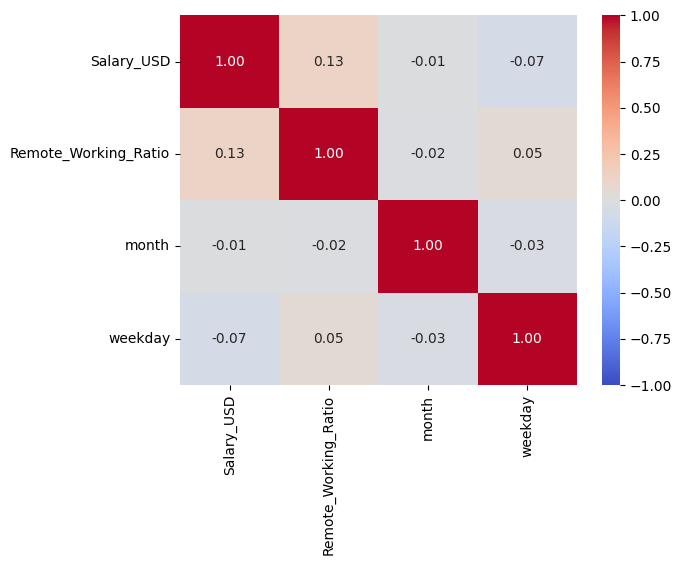

In [117]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Set up a correlation matrix for specific values to view in the correlation heatmap
correlation_matrix = salaries[['Salary_USD', 'Remote_Working_Ratio', 'month', 'weekday']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [113]:
print(salaries.columns)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD', 'Job_Category', 'date_of_response', 'month', 'weekday'],
      dtype='object')


### Calculating salary percentiles

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

In [118]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


### Categorizing salaries - NUMERICAL COLUMN ONLY WILL WORK!

Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

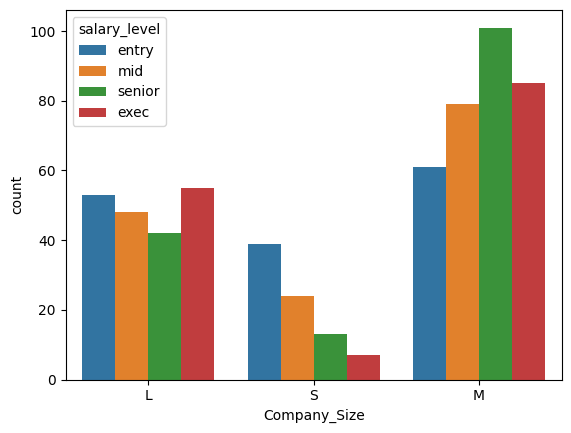

In [124]:
# Create salary labels
salary_labels = ['entry','mid', 'senior', 'exec']

# Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD".
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels.
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

### Comparing salaries

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.

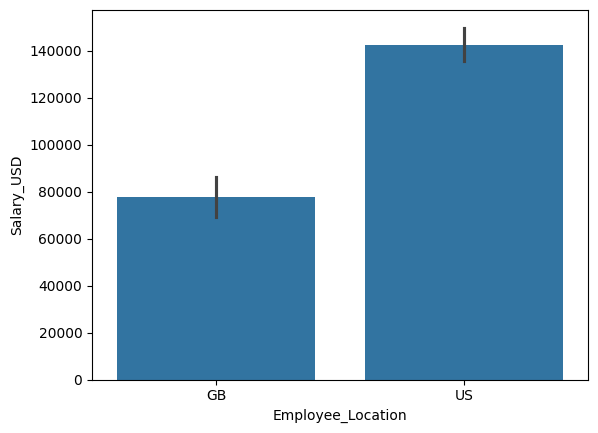

In [128]:
# Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.
usa_and_gb = salaries[salaries['Employee_Location'].isin(["US", "GB"])]

# Use usa_and_gb to create a barplot visualizing "Salary_USD" against "Employee_Location".
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

### Choosing a hypothesis

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values: 

* CT = Contractor
* FL = Freelance
* PT = Part-time
* FT = Full-time 

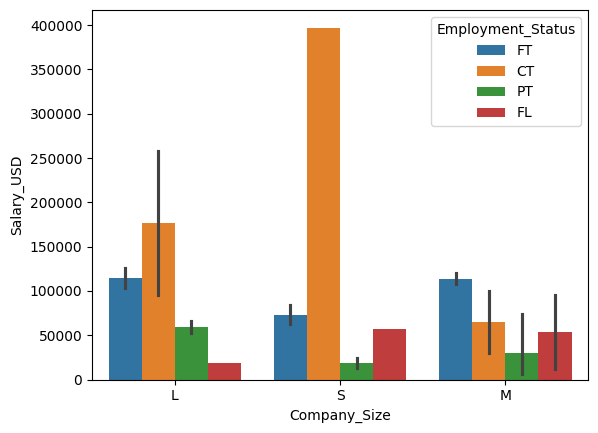

In [130]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

What is a reasonable hypothesis to generate based on this plot?

* On average, small companies pay part-time employees less than large companies. - TRUE

* Freelancers earn more at medium-sized companies compared to small or large companies. FALSE

* On average, large companies pay contractors more than medium-sized companies. - TRUE

* No hypotheses can be generated from this plot. - FALSE